# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
2. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
3. Опишите результаты

In [1]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utils.info import *
from utils.data import *

In [2]:
SIZE_X = 14
SIZE_Y = 7
figsize(SIZE_X, SIZE_Y)
sns.set_theme()

In [3]:
X, y = get_user_data_X_y()
# X, y = get_nba_X_y()
# X, y = get_vk_X_y()

<AxesSubplot:>

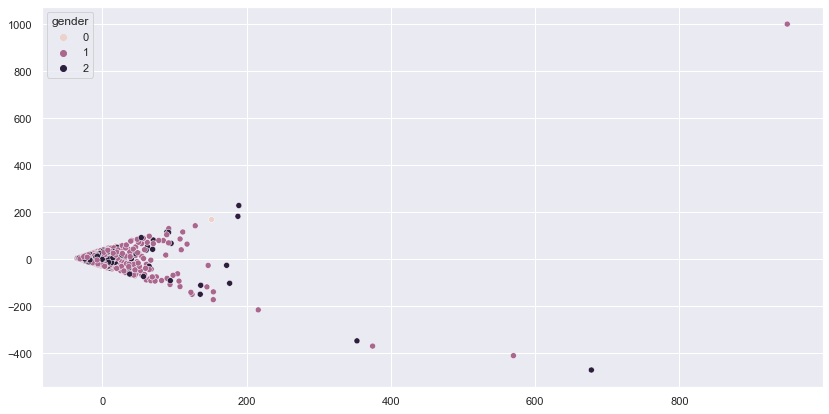

In [4]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA_reduced = pca.fit_transform(X)
sns.scatterplot(x=X_PCA_reduced[:, 0], y=X_PCA_reduced[:, 1], hue=y)

<AxesSubplot:>

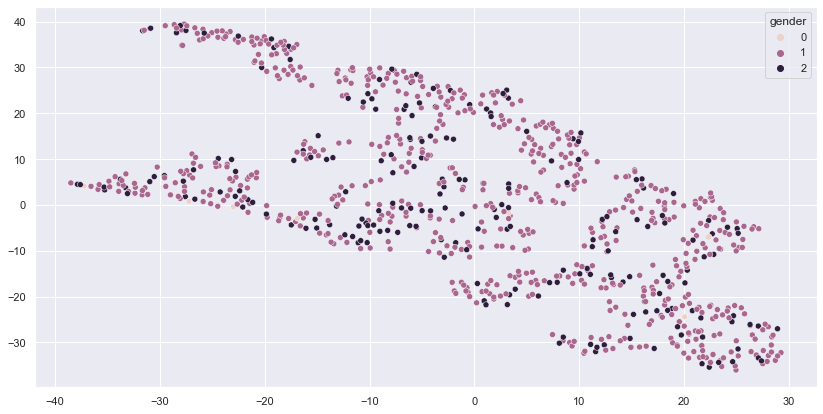

In [5]:
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
X_TSNE_reduced = tsne.fit_transform(X)
sns.scatterplot(x=X_TSNE_reduced[:, 0], y=X_TSNE_reduced[:, 1], hue=y)

<AxesSubplot:>

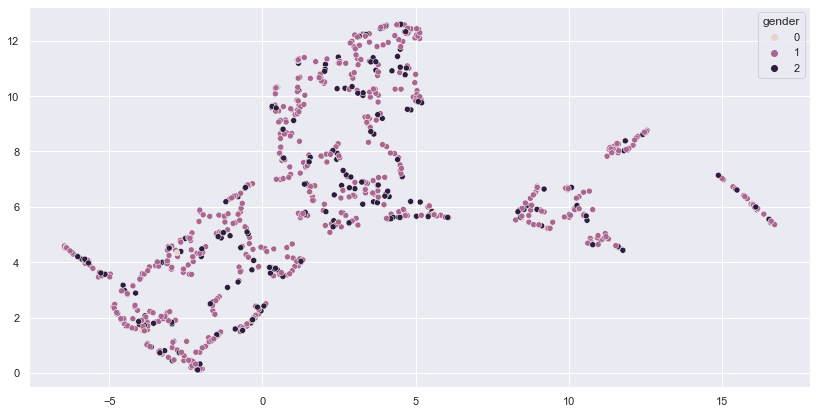

In [6]:
reducer = umap.UMAP(n_components=2, n_neighbors=9, low_memory=False, random_state=42)
X_UMAP_reduced = reducer.fit_transform(X)
sns.scatterplot(x=X_UMAP_reduced[:, 0], y=X_UMAP_reduced[:, 1], hue=y)

Cумма квадратов расстояний от точек до центроидов кластеров, к которым они относятся.

![](./images/J(C).jpg)

Для выбора числа кластеров часто пользуются такой эвристикой: выбирают то число кластеров, начиная с которого описанный функционал $ J(C) $ падает "уже не так быстро". Или более формально:

![](./images/D(k).jpg)


In [7]:
# find_Clusters(X, X_PCA_reduced, to_Drow)

In [8]:
to_Drow = True
to_Drow_find_K = True

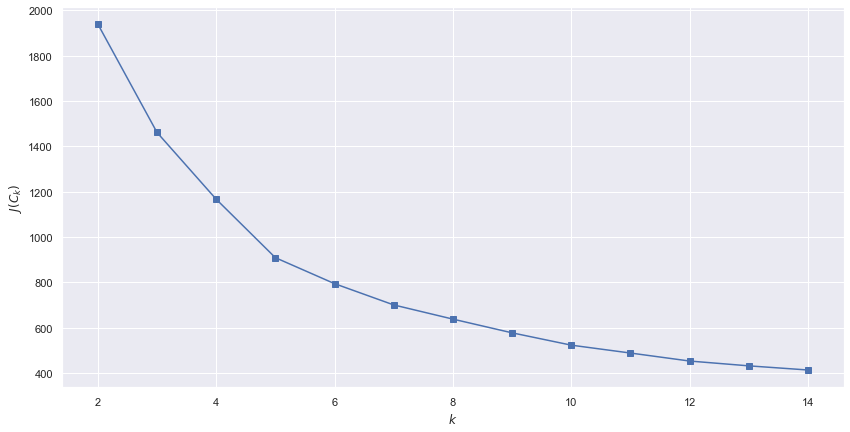

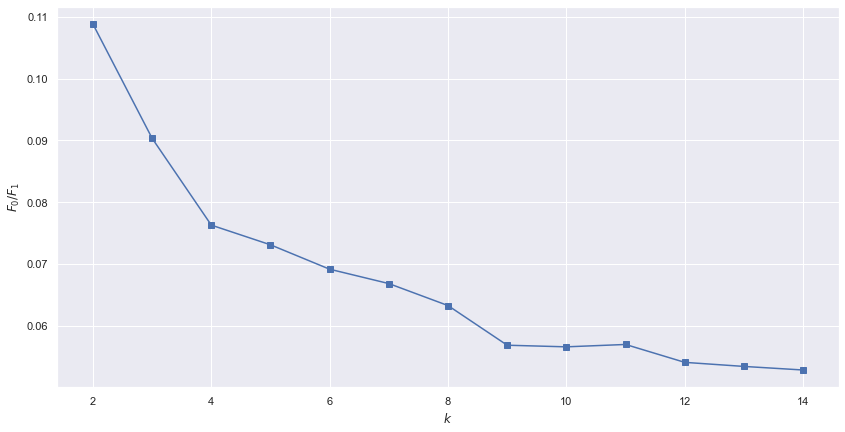

In [9]:
find_Clusters(X, X_PCA_reduced, to_Drow_find_K)

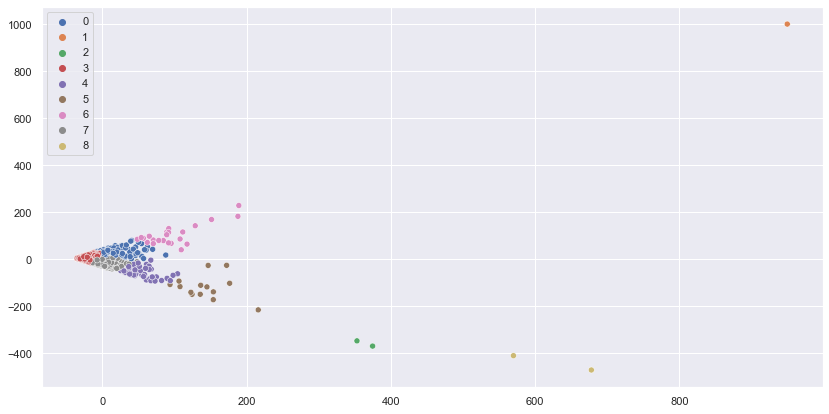

---- PCA ----
    Среднее Внутрикластерное растояние:  14.418761774746322
    Среднее Межкластерное расстояние: 251.72235135276654
    Внутрикластерное/Межкластерное: 0.057280419069897004

   ==Внешние меры==
    Rand_score: 0.4757782604198986
    F-Measure:   0.4858605561982165
   ==Внутренние меры==
    Компактность кластеров:  348332.80039713933
    Отделимость кластеров: 2470669020.8041763
    Силуэт: 0.49408573938086153
    Калински и Харабаз: 1666.9617231775374


In [15]:
print_info(X, y, X_PCA_reduced, 9, "PCA", to_Drow)

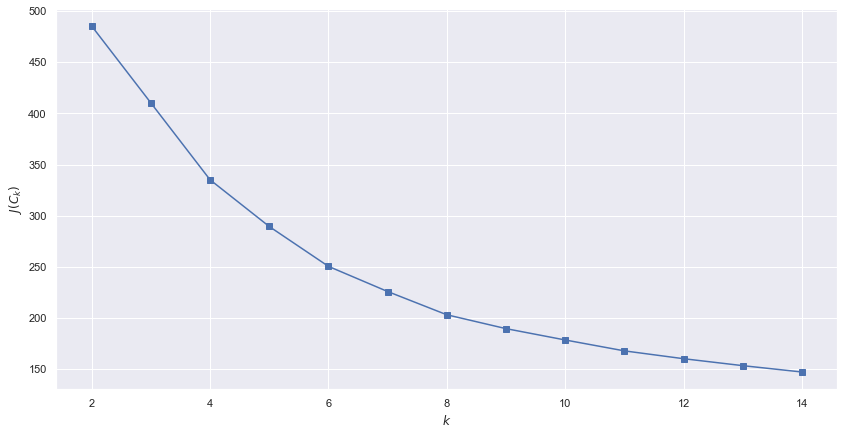

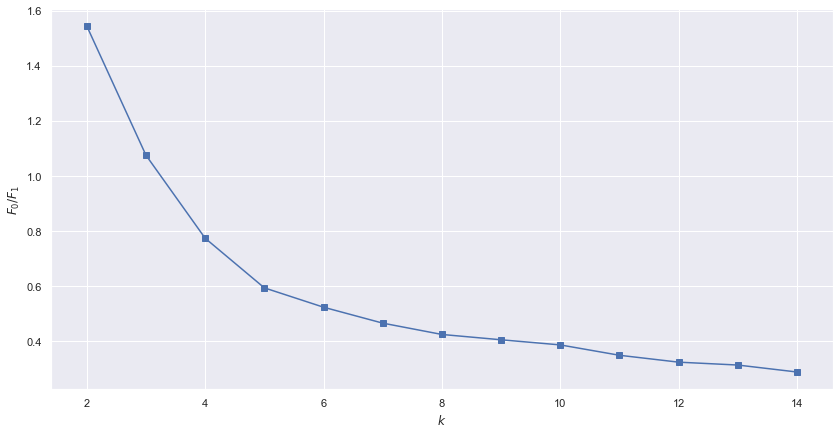

In [11]:
find_Clusters(X, X_TSNE_reduced, to_Drow_find_K)

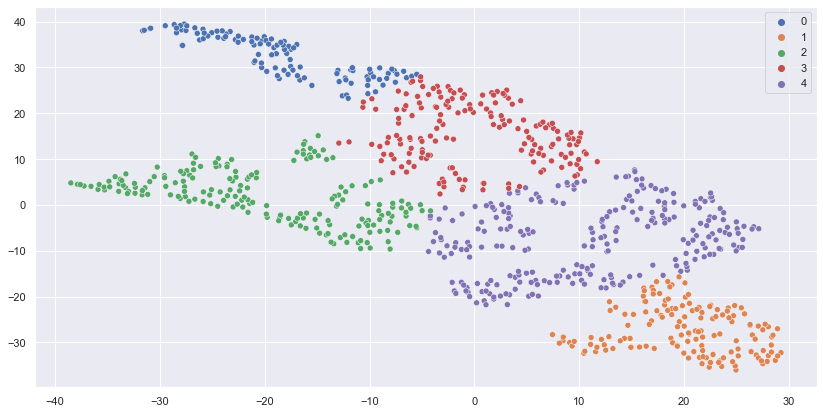

---- TSNE ----
    Среднее Внутрикластерное растояние:  8.999810218811035
    Среднее Межкластерное расстояние: 15.102678298950195
    Внутрикластерное/Межкластерное: 0.5959082245826721

   ==Внешние меры==
    Rand_score: 0.43051763367463025
    F-Measure:   0.3294222729792873
   ==Внутренние меры==
    Компактность кластеров:  3949236.773914449
    Отделимость кластеров: 11421908.28597831
    Силуэт: 0.11247515909405656
    Калински и Харабаз: 95.95534947668247


In [12]:
print_info(X, y, X_TSNE_reduced, 5, "TSNE", to_Drow)

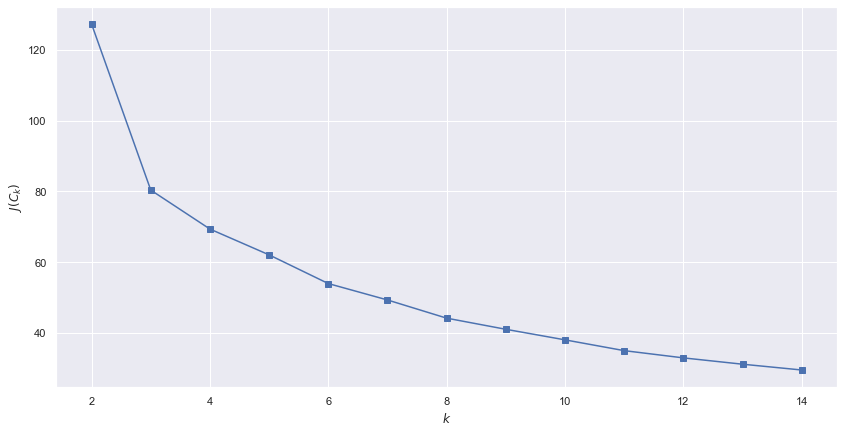

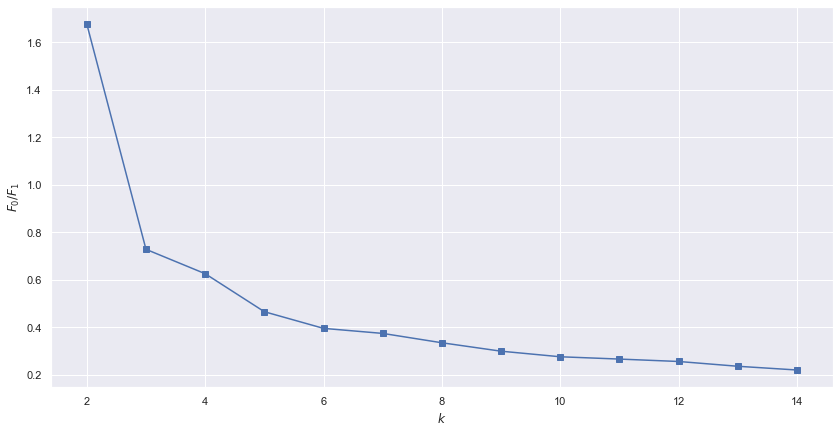

In [13]:
find_Clusters(X, X_UMAP_reduced, to_Drow_find_K)

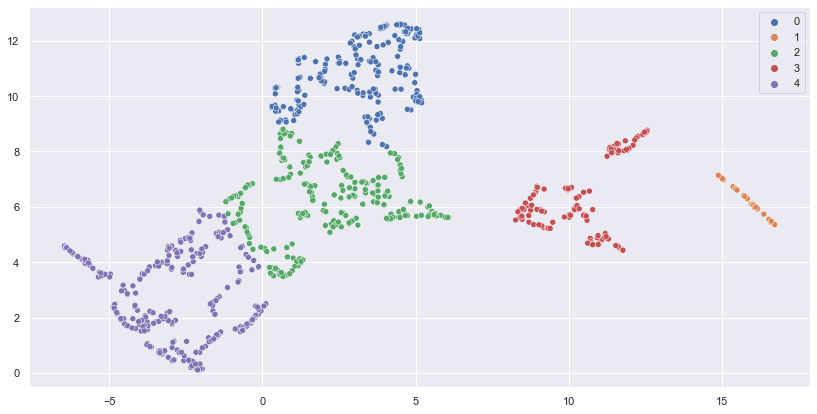

---- UMAP ----
    Среднее Внутрикластерное растояние:  1.9174963235855103
    Среднее Межкластерное расстояние: 4.125802516937256
    Внутрикластерное/Межкластерное: 0.46475717425346375

   ==Внешние меры==
    Rand_score: 0.4371031130416796
    F-Measure:   0.36235499201951904
   ==Внутренние меры==
    Компактность кластеров:  3491067.216427549
    Отделимость кластеров: 30977988.580777366
    Силуэт: 0.22679941966662323
    Калински и Харабаз: 137.25745045886924


In [14]:
print_info(X, y, X_UMAP_reduced, 5, "UMAP", to_Drow)

![](./images/SepCoh.jpg)


![](./images/Rand.jpg)

![](./images/F-mesuare.jpg)

![](./images/Silhouette.jpg)

![](./images/Calinski-Harabasz.jpg)